<a href="https://colab.research.google.com/github/samuel1sm/Project_MPCE/blob/main/TestesFaceClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Preparação do ambiente*


In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install face_recognition
!pip install networkx

     |████████████████████████████████| 100.2MB 105kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=eefd462936bf364d2c3f6a7b651c01394dd1494e3ea23994a61aabcd28b63926
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
import dlib

In [ ]:
 import shutil
 shutil.rmtree('/imgs', ignore_errors=True)

!ln -s "/content/gdrive/My Drive/Datasets/ProjetoMPCE/TestDataset/Faces" imgs
if not os.path.exists("dataset"):
  os.mkdir("dataset")

In [ ]:
data7s = os.listdir("imgs/")
data7s

['SortedImages.zip', 'data7.zip']

In [ ]:
data7s = ['SortedImages.zip']

In [ ]:
from zipfile import ZipFile

In [ ]:
for i in data7s:
  with ZipFile(f"imgs/{i}", 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall("dataset/")

In [ ]:
import glob 
images_path = glob.glob("dataset/*")


# *Codificando faces*




In [ ]:
from imutils import paths
import face_recognition
import argparse
import pickle
import cv2
import os

In [ ]:
print("[INFO] quantifying faces...")
imagePaths = images_path
detection_method = "cnn"
encondings_path = "encodings/"
data = []

if not os.path.exists(encondings_path):
  os.mkdir(encondings_path)

[INFO] quantifying faces...


In [ ]:
data = []

for (i, imagePath) in enumerate(images_path):
	# load the input image and convert it from RGB (OpenCV ordering)
	# to dlib ordering (RGB)
  print(f"[INFO] processing {imagePath} , {i + 1}/{len(images_path)}")
  print(imagePath)
  image = cv2.imread(imagePath)
  rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  boxes = face_recognition.face_locations(rgb,  model=detection_method)

  encodings = face_recognition.face_encodings(rgb, boxes)

  # build a dictionary of the image path, bounding box location,
  # and facial encodings for the current image
  d = [{"imagePath": imagePath, "loc": box, "encoding": enc}
    for (box, enc) in zip(boxes, encodings)]
  data.extend(d)

[INFO] processing dataset/65.jpg , 1/91
dataset/65.jpg
[INFO] processing dataset/57.jpg , 2/91
dataset/57.jpg
[INFO] processing dataset/89.jpg , 3/91
dataset/89.jpg
[INFO] processing dataset/41.jpg , 4/91
dataset/41.jpg
[INFO] processing dataset/73.jpg , 5/91
dataset/73.jpg
[INFO] processing dataset/82.jpg , 6/91
dataset/82.jpg
[INFO] processing dataset/72.jpg , 7/91
dataset/72.jpg
[INFO] processing dataset/15.jpg , 8/91
dataset/15.jpg
[INFO] processing dataset/29.jpg , 9/91
dataset/29.jpg
[INFO] processing dataset/75.jpg , 10/91
dataset/75.jpg
[INFO] processing dataset/33.jpg , 11/91
dataset/33.jpg
[INFO] processing dataset/88.jpg , 12/91
dataset/88.jpg
[INFO] processing dataset/52.jpg , 13/91
dataset/52.jpg
[INFO] processing dataset/59.jpg , 14/91
dataset/59.jpg
[INFO] processing dataset/11.jpg , 15/91
dataset/11.jpg
[INFO] processing dataset/86.jpg , 16/91
dataset/86.jpg
[INFO] processing dataset/69.jpg , 17/91
dataset/69.jpg
[INFO] processing dataset/19.jpg , 18/91
dataset/19.jpg
[

In [ ]:
print(len(data))
print("[INFO] serializing encodings...")
f = open(f"data.pickle", "wb")
f.write(pickle.dumps(data))
f.close()

238
[INFO] serializing encodings...


# *Clusterizando faces*


In [ ]:
from sklearn.cluster import DBSCAN,KMeans
from imutils import build_montages
import numpy as np
import argparse
import pickle
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import dlib 

In [ ]:
imagePaths = images_path
jobs = -1
detection_method = "cnn"

In [ ]:
print("[INFO] loading encodings...")
# data = pickle.loads(open(encondings_path, "rb").read())
df = pd.DataFrame(data)
encodings =[dlib.vector(i) for i in df["encoding"].values.tolist()]

[INFO] loading encodings...


**Chinese Whispers**

In [ ]:
labels = dlib.chinese_whispers_clustering(encodings, 0.5)
df["cluster"] = labels

**K-Means**

13


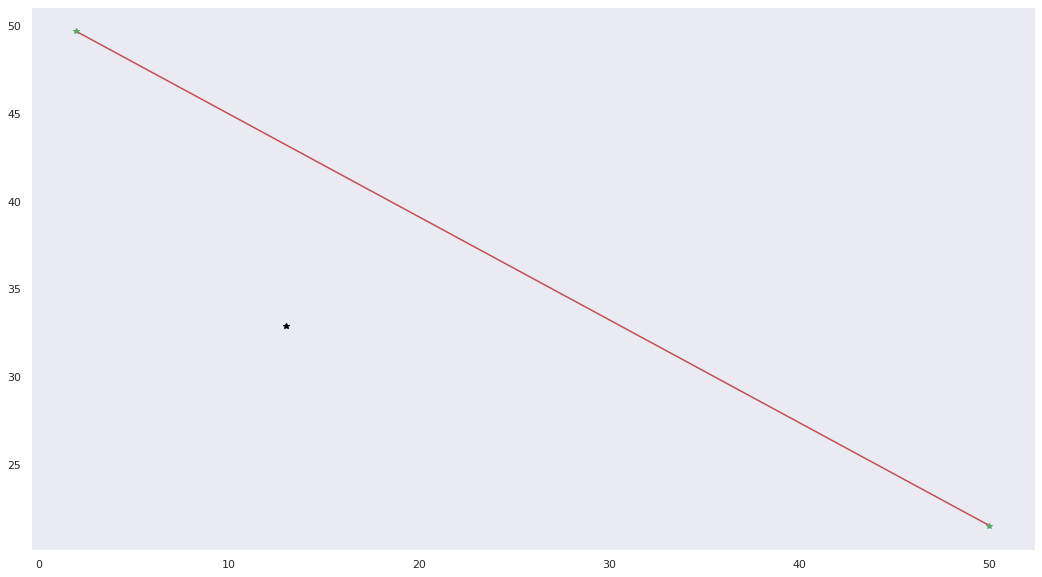

In [ ]:
# def kmeans(numero_de_clusters, dados):
#     modelo = KMeans(n_clusters=numero_de_clusters, random_state=0)
#     modelo.fit(dados)
#     return [numero_de_clusters,modelo.inertia_], modelo.labels_


# max = 50
# p1=np.array(kmeans(2, encodings)[0])
# p2=np.array(kmeans(max, encodings)[0])



# distance = 0
# qtd_cluster = 0
# finded_clusters = 0

# result_final = 0
# joelho =[]
# plt.figure(figsize=(18,10))
# x = [p1[0],p2[0]]
# y = [p1[1],p2[1]]
# plt.plot(x, y, c="r")
# x = []
# y = []

# for i in range(13,13+1):

#     result,clusters = kmeans(i, encodings)
#     p3=np.array(result)
#     d=np.cross(p2-p1,p3-p1)/np.linalg.norm(p2-p1)
    
#     joelho.append(result)
#     x.append(result[0])
#     y.append(result[1])
#     plt.plot(result[0],result[1], 'r*', c = 'b')

#     if abs(d) > distance:
#       distance = abs(d)
#       qtd_cluster= i
#       result_final = result
#       finded_clusters = clusters

# df["cluster"] = finded_clusters
# print(qtd_cluster)
# plt.plot(p1[0],p1[1], 'r*', c = 'g')
# plt.plot(p2[0],p2[1], 'r*', c = 'g')
# plt.plot(result_final[0],result_final[1], 'r*', c = 'black')
# plt.plot(x, y)


# *Verificando Clusterização Imagens*


In [ ]:
qtd_cluster= len(df["cluster"].unique())
qtd_cluster

44

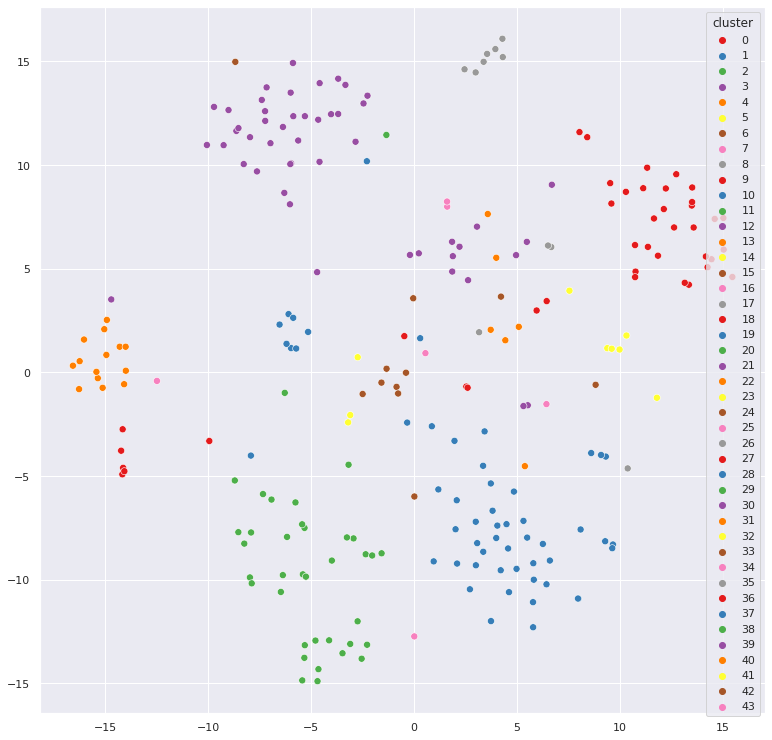

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE()
visualizacao = tsne.fit_transform(encodings)
import seaborn as sns

sns.set(rc={'figure.figsize': (13, 13)})
# sns.set_style("whitegrid", {'axes.grid' : False})
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=df["cluster"],
               palette=sns.color_palette('Set1',qtd_cluster), s = 50)

# *Gerar grafo*


In [ ]:
import networkx as nx

In [ ]:
# filtro = df.groupby(by="imagePath").apply(lambda a: a["cluster"].tolist())
graph_df = df.drop(columns = ["loc", "encoding"])
graph_df = graph_df.merge(graph_df, on = "imagePath")
graph_df = graph_df.query("cluster_x < cluster_y")
# filtro3 = filtro2.loc[filtro2[["cluster_x", "cluster_y"]].apply(lambda a: a["cluster_x"] != a["cluster_y"], axis = 1)]
graph_df.drop_duplicates(inplace= True)
# graph_df.query("cluster_x == 1").apply(lambda a: print(a["imagePath"],a["cluster_x"],a["cluster_y"]),axis =1)

In [ ]:
occurrences = graph_df.groupby(by="cluster_x").apply(lambda a:( a["cluster_y"].tolist()))

In [ ]:
graph_df = graph_df.sort_values(by=['cluster_x', 'cluster_y']).drop_duplicates(subset=['cluster_x', 'cluster_y']).reset_index(drop=True)

In [ ]:
result = []
for i,occurrence in enumerate(occurrences):
  fitered = np.unique(np.array(occurrence), return_counts = True)
  result.extend(fitered[1])

graph_df["occurrence"] = result

In [ ]:
self_pointg_df = {"imagePath" : [], "cluster_x" : [],"cluster_y" : [], "occurrence" : []}
for cluster in df["cluster"].unique():
  im_path = df[df["cluster"] == cluster]["imagePath"].values[0]
  self_pointg_df["imagePath"].append(im_path)
  self_pointg_df["cluster_x"].append(cluster)
  self_pointg_df["cluster_y"].append(cluster)
  self_pointg_df["occurrence"].append(1)

aux_df = pd.DataFrame(self_pointg_df)
graph_df = pd.concat([graph_df, aux_df])

In [ ]:
edge_label = {}
graph_df.apply(lambda a: edge_label.update({(a["cluster_x"],a["cluster_y"]) : a["occurrence"]}), axis = 1)
print()

In [ ]:
G = nx.from_pandas_edgelist(graph_df, source="cluster_x", target = "cluster_y", edge_attr=["occurrence"] )

In [ ]:
df_img_exemple = df.drop_duplicates("cluster").sort_values("cluster").reset_index(drop = True)

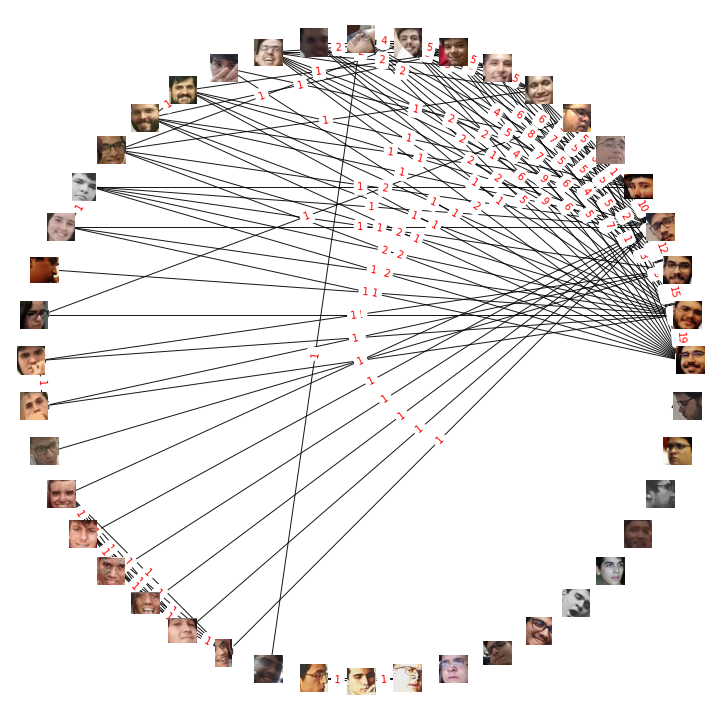

In [ ]:
fig=plt.figure(figsize=(13, 13))
ax=plt.subplot(111)
ax.set_aspect('equal')

pos=nx.circular_layout(G)

nx.draw(G,pos,edge_color='black',width=1,linewidths=1,\
node_size=1,node_color='pink',alpha=0.9,\
labels={node:node for node in G.nodes()}, ax =ax)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_label,font_color='red', ax = ax)


trans=ax.transData.transform
trans2=fig.transFigure.inverted().transform

piesize=0.03 # this is the image size
p2=piesize/2.0
for n in G:
    xx,yy=trans(pos[n]) # figure coordinates
    xa,ya=trans2((xx,yy)) # axes coordinates
    a = plt.axes([xa-p2,ya-p2, piesize, piesize])

    line = df_img_exemple.iloc[n]
    image = cv2.imread(line["imagePath"])
    (top, right, bottom, left) = line["loc"]
    face = image[top:bottom, left:right]
    face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

    a.imshow(face)
    a.axis('off')

nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_label,font_color='red', ax = ax)

plt.axis('off')
plt.show()

# *Plotando Imagens*


In [ ]:
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

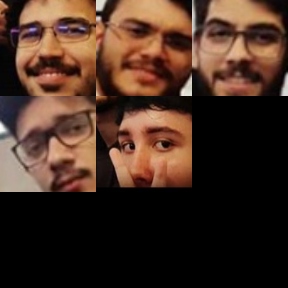

In [ ]:
filtro = df[df["imagePath"] == "dataset/65.jpg"]

filtro.reset_index(inplace=True)
faces = []
for i,line in filtro.iterrows():
    image = cv2.imread(line["imagePath"])
    (top, right, bottom, left) = line["loc"]
    face = image[top:bottom, left:right]
    face = cv2.resize(face, (96, 96))
    faces.append(face)
  
montage = build_montages(faces, (96, 96), (3, 3))[0]
cv2_imshow(montage)


In [ ]:
clusters_list = [0,7]
filtro = df[df["cluster"].isin(clusters_list)].copy()
filtro= filtro.groupby("imagePath").filter(lambda x: True if len(x["cluster"].unique()) == len(clusters_list) else False)
filtro = filtro.drop_duplicates(subset=['imagePath']).copy()
filtro.reset_index(inplace=True)
print(f"qtd: {len(filtro)}")
plt.figure(figsize=(8,14))
plt.rcParams["axes.grid"] = False

columns = 2
for i,line in filtro.iterrows():
      
    plt.subplot(((int(len(filtro)) +1)/columns),columns,i+1)
    img = cv2.imread(line["imagePath"])
    # cv2_imshow(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.title(line["imagePath"])
plt.show()

qtd: 0


<Figure size 576x1008 with 0 Axes>

In [ ]:
filtro = df[df["cluster"] == 1].copy()

filtro.reset_index(inplace=True)
plt.figure(figsize=(18,20))
plt.rcParams["axes.grid"] = False

columns = 4
for i,line in filtro.iterrows():
    
    plt.subplot(int(len(filtro)/columns)+1,columns,i+1)
    img = cv2.imread(line["imagePath"])
    # cv2_imshow(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
plt.show()

NameError: ignored

[INFO] faces for face ID: 0


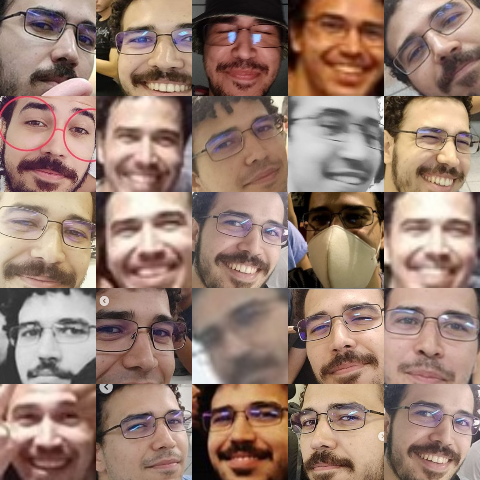

[INFO] faces for face ID: 1


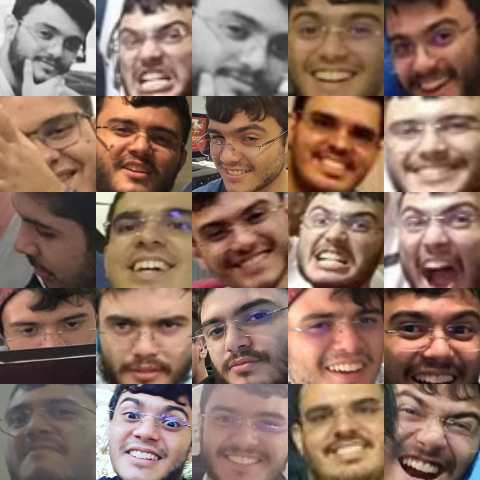

[INFO] faces for face ID: 2


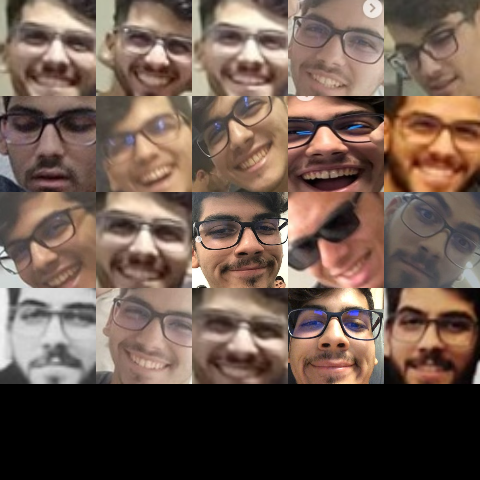

[INFO] faces for face ID: 3


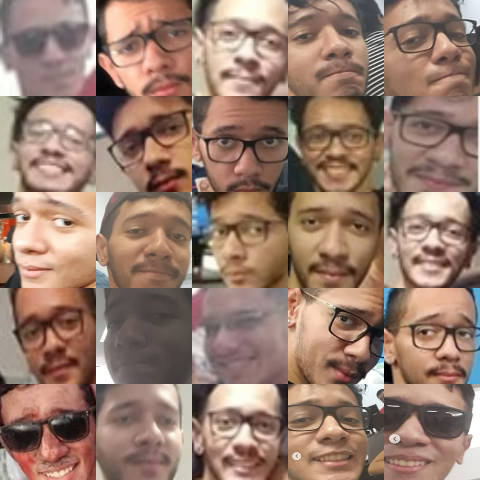

[INFO] faces for face ID: 4


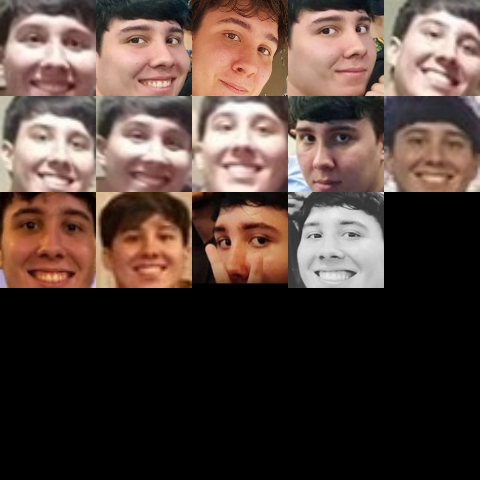

[INFO] faces for face ID: 5


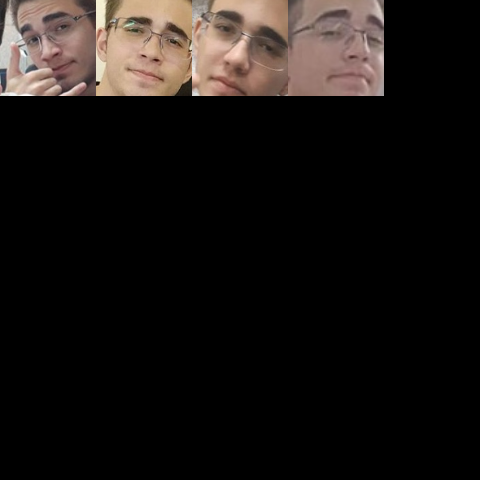

[INFO] faces for face ID: 6


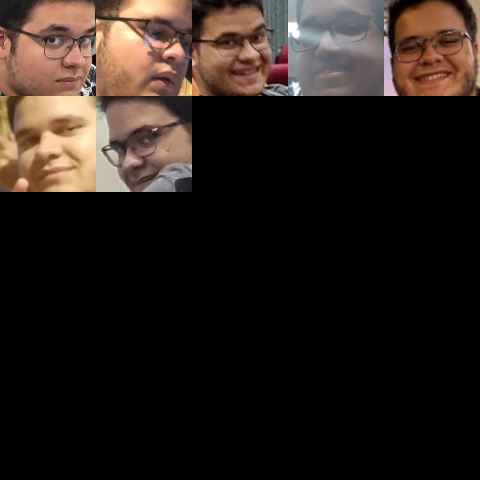

[INFO] faces for face ID: 7


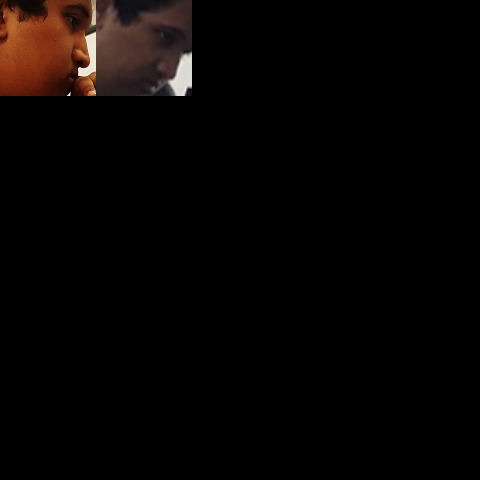

[INFO] faces for face ID: 8


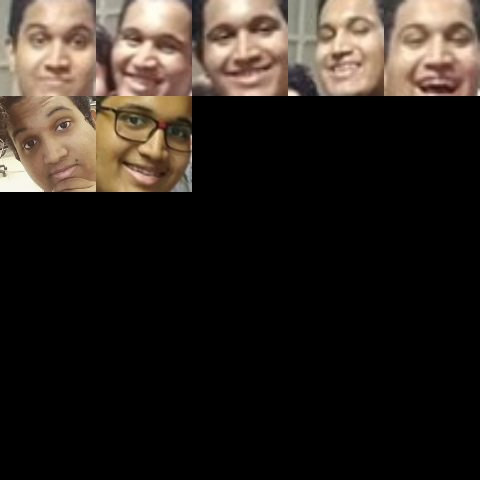

[INFO] faces for face ID: 9


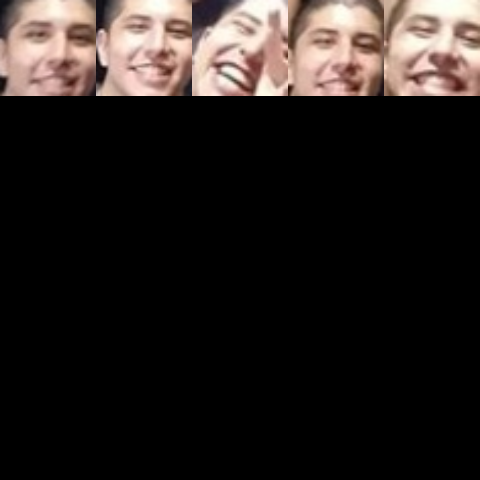

[INFO] faces for face ID: 10


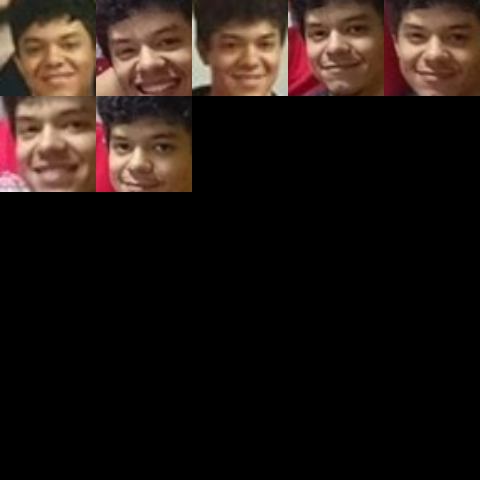

[INFO] faces for face ID: 11


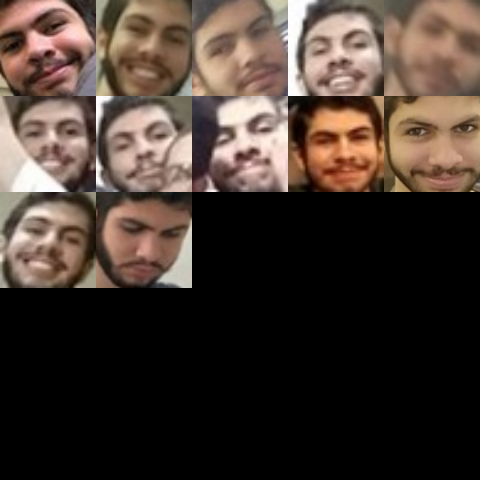

[INFO] faces for face ID: 12


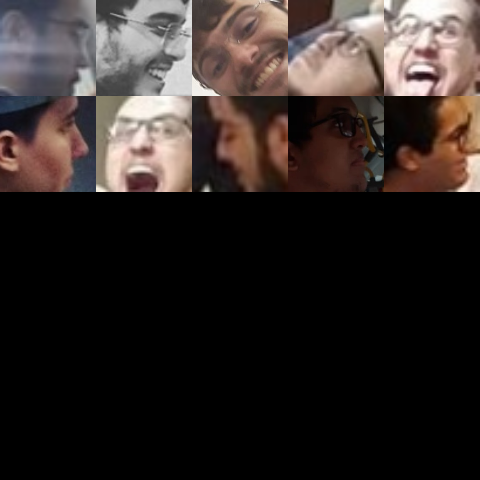

[INFO] faces for face ID: 13


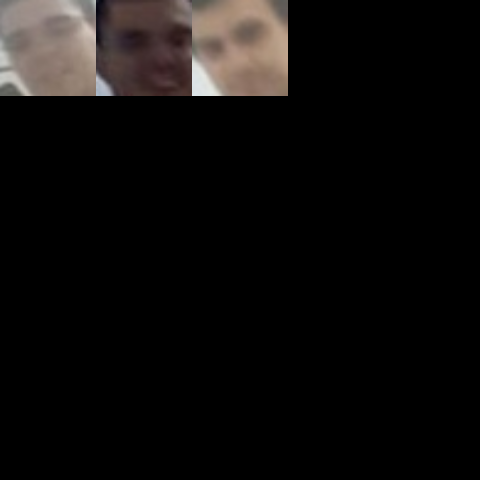

[INFO] faces for face ID: 14


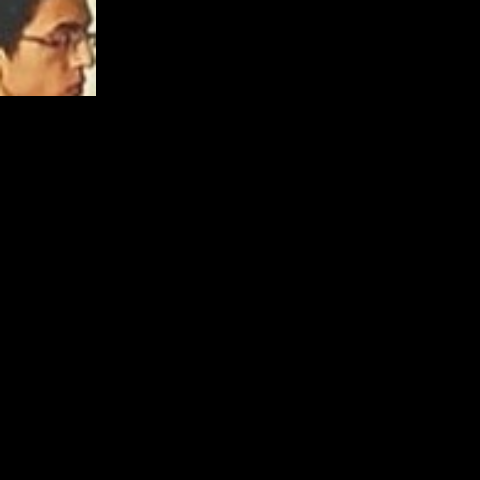

[INFO] faces for face ID: 15


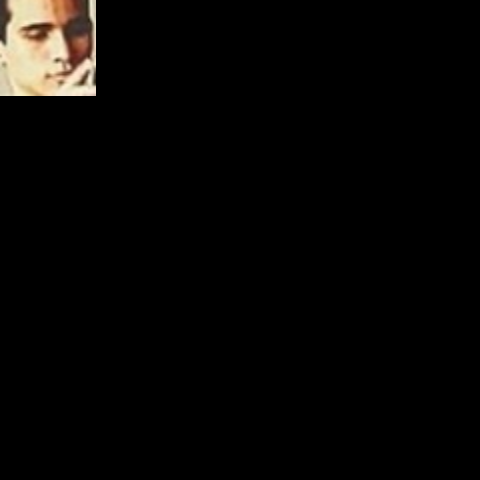

[INFO] faces for face ID: 16


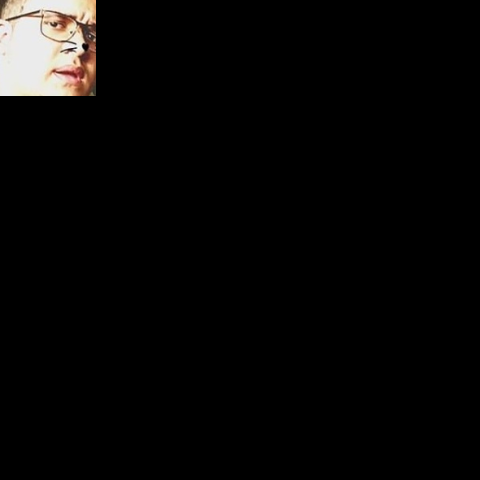

[INFO] faces for face ID: 17


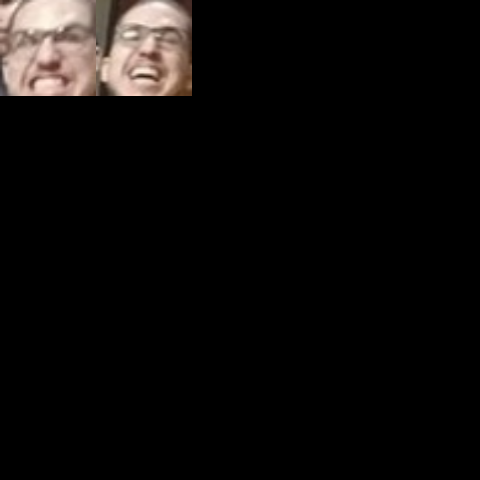

[INFO] faces for face ID: 18


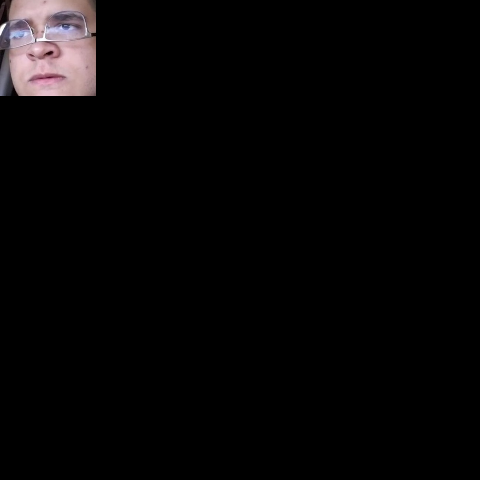

[INFO] faces for face ID: 19


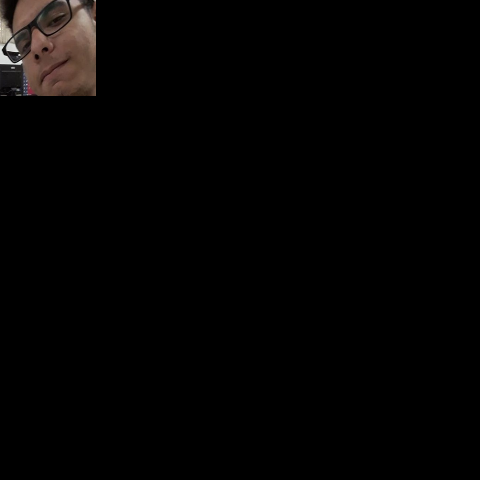

[INFO] faces for face ID: 20


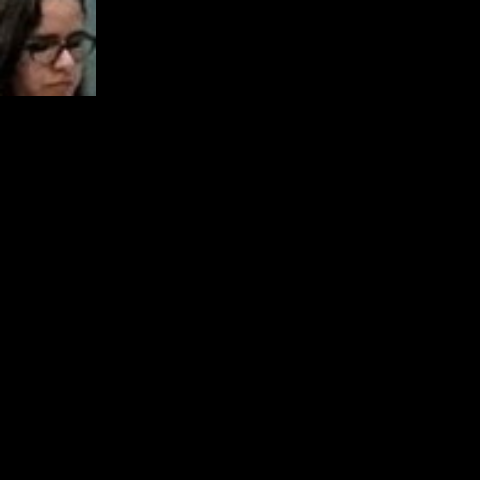

[INFO] faces for face ID: 21


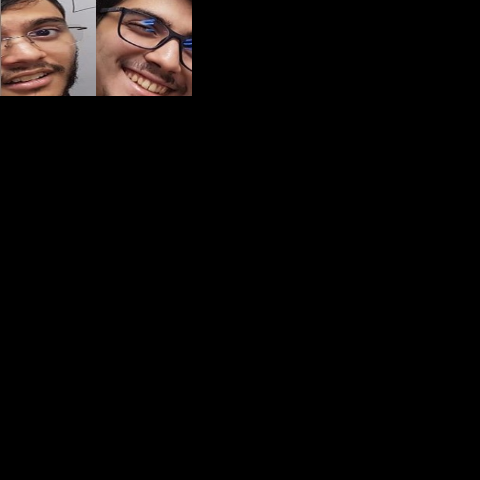

[INFO] faces for face ID: 22


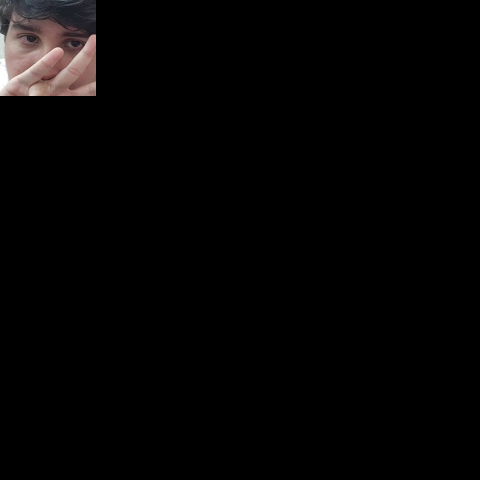

[INFO] faces for face ID: 23


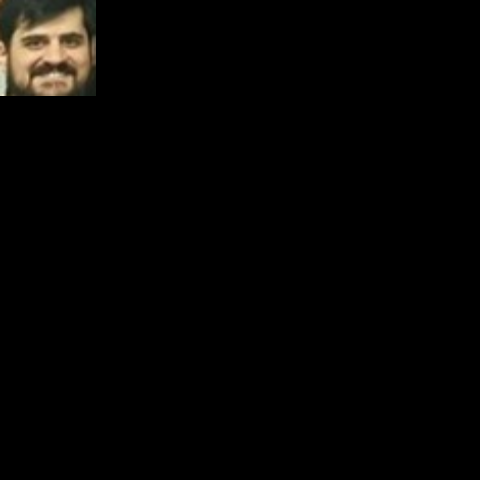

[INFO] faces for face ID: 24


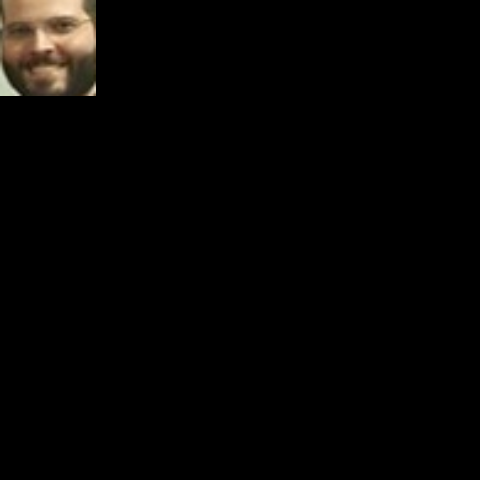

[INFO] faces for face ID: 25


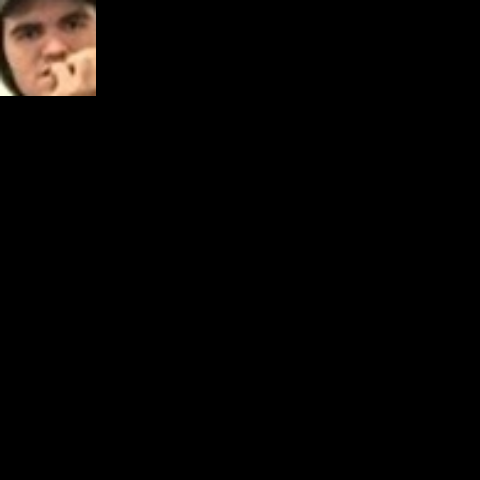

[INFO] faces for face ID: 26


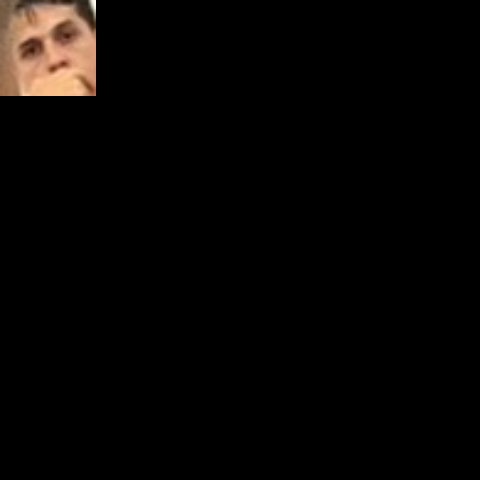

[INFO] faces for face ID: 27


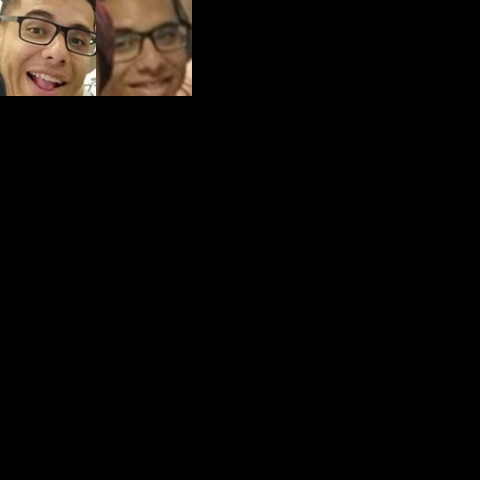

[INFO] faces for face ID: 28


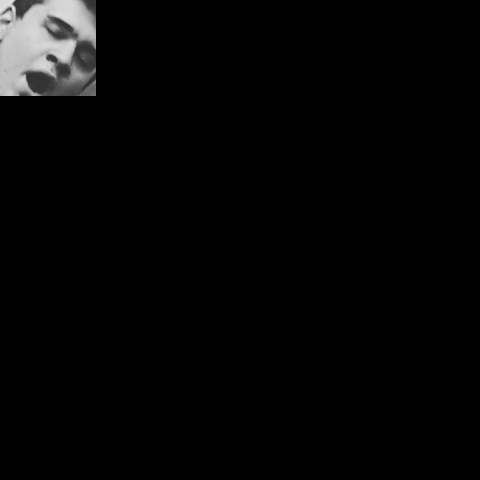

[INFO] faces for face ID: 29


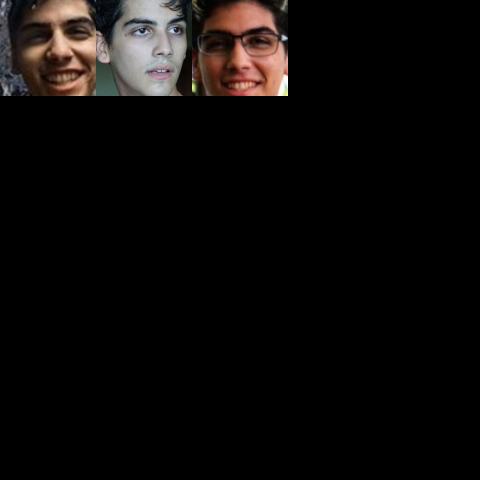

[INFO] faces for face ID: 30


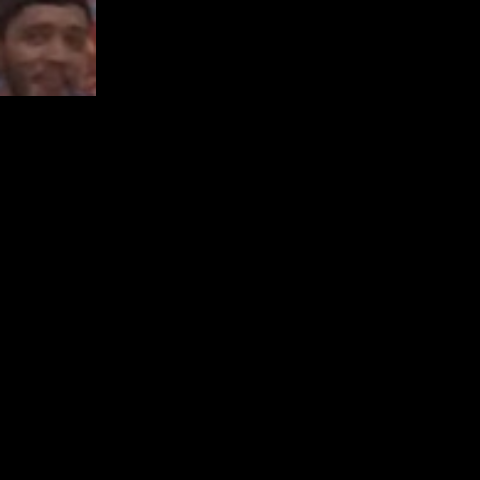

[INFO] faces for face ID: 31


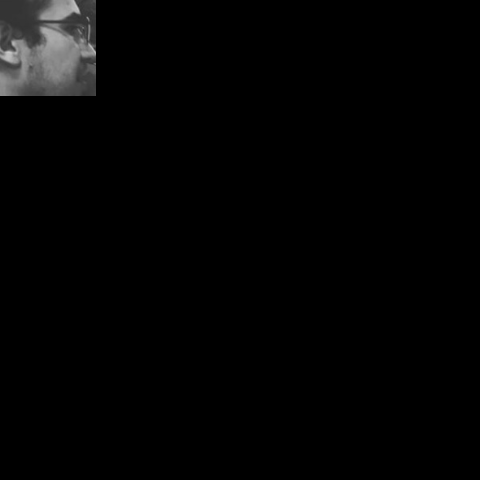

[INFO] faces for face ID: 32


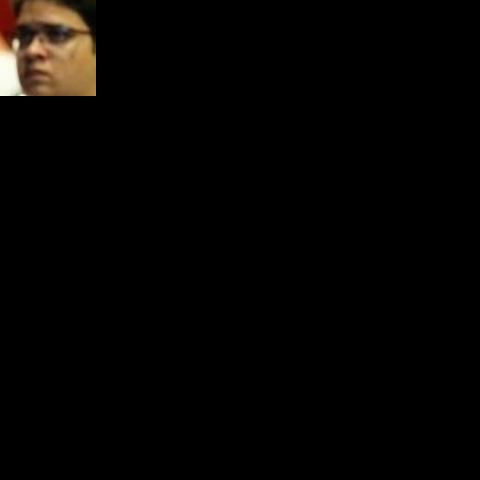

[INFO] faces for face ID: 33


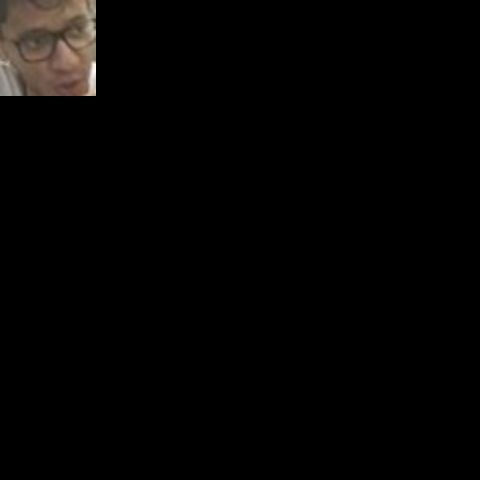

[INFO] faces for face ID: 34


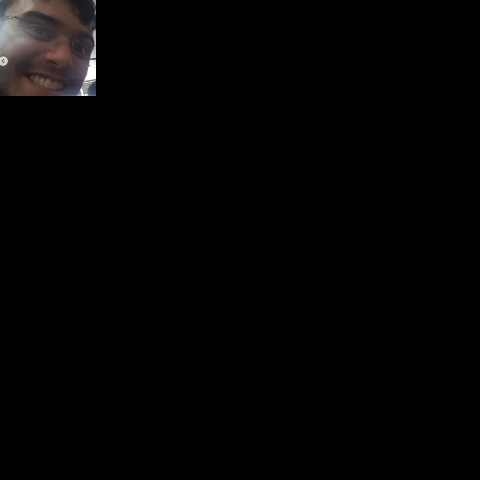

[INFO] faces for face ID: 35


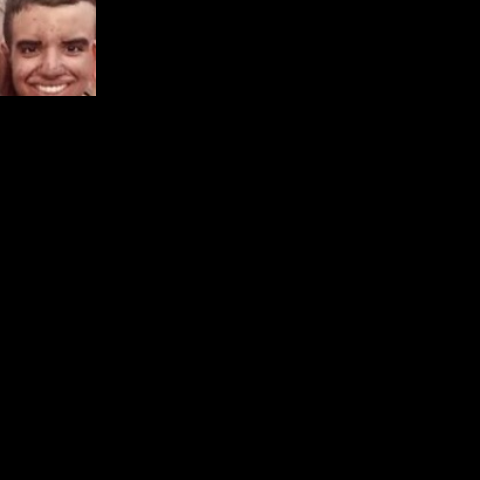

[INFO] faces for face ID: 36


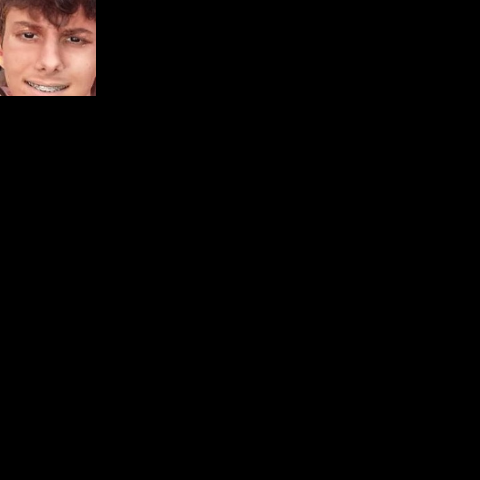

[INFO] faces for face ID: 37


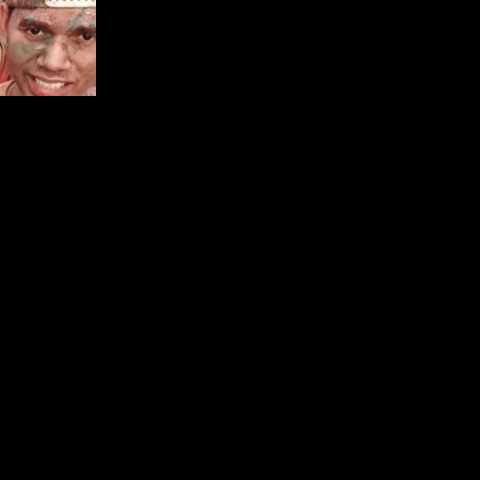

[INFO] faces for face ID: 38


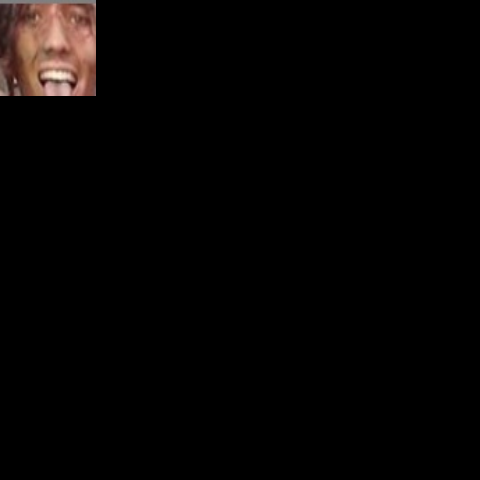

[INFO] faces for face ID: 39


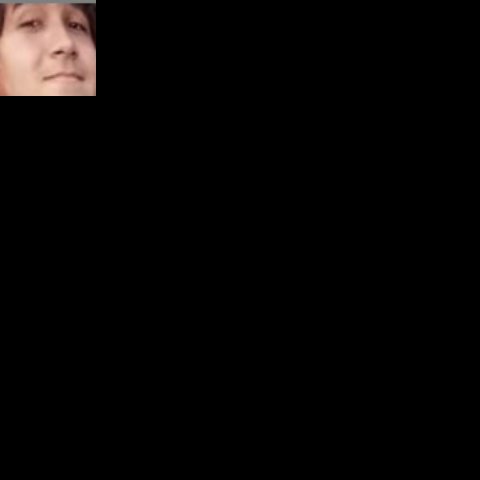

[INFO] faces for face ID: 40


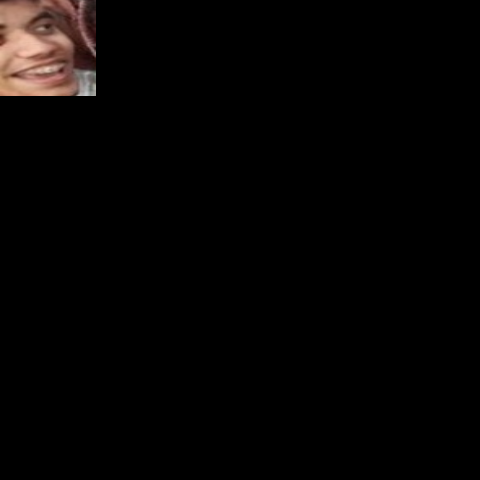

[INFO] faces for face ID: 41


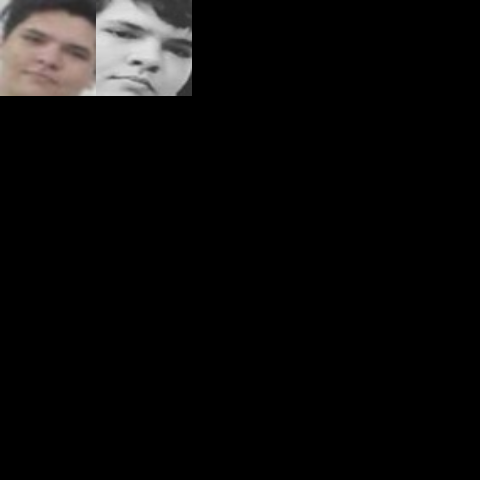

[INFO] faces for face ID: 42


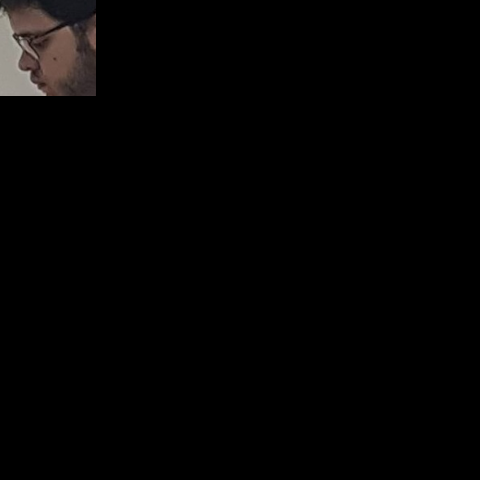

[INFO] faces for face ID: 43


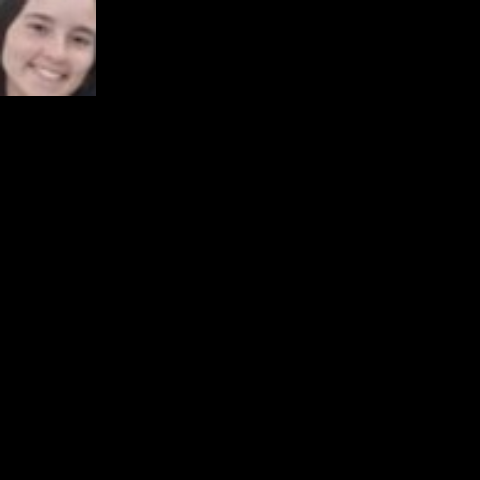

In [ ]:
for labelID in np.sort(df["cluster"].unique()):
  print("[INFO] faces for face ID: {}".format(labelID))
  idxs = df[df["cluster"] == labelID]
  idx = idxs.sample(min(25, len(idxs)))

  faces = []
  for i,line in idx.iterrows():
    image = cv2.imread(line["imagePath"])
    (top, right, bottom, left) = line["loc"]
    face = image[top:bottom, left:right]
    face = cv2.resize(face, (96, 96))
    faces.append(face)

  montage = build_montages(faces, (96, 96), (5, 5))[0]

	# show the output montage
  title = "Face ID #{}".format(labelID)
  title = "Unknown Faces" if labelID == -1 else title
  cv2_imshow(montage)
